# Analysis of COVID-19 Cases in Ontario Schools

### Peter Stangolis


### Import the required libraries

In [85]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.pyplot import figure

from pylab import rcParams
#rcParams['figure.figsize'] = 18, 6

import datetime
import seaborn as sns

import matplotlib.dates as mdates

#### Graph Settings

In [86]:
# Graph Style Settings:

#plt.figure(figsize=(10, 5))

plt.style.use(['default', 'seaborn-poster'])

%matplotlib inline

#### Import the cleaned data sets

In [87]:
# Ontario Schools COVID-19 Cases data set
os_df = pd.read_csv('ont_school_covid19_101.csv')
os_df.tail()

,reported_date,current_schools_w_cases,current_schools_closed,current_total_number_schools,new_total_school_related_cases,new_school_related_student_cases,new_school_related_staff_cases,new_school_related_unspecified_cases,recent_total_school_related_cases,cumulative_school_related_cases,cumulative_school_related_student_cases,cumulative_school_related_staff_cases,cumulative_school_related_unspecified_cases
48,2020-11-19,680,3,4828,91,75,16,0.0,1143.0,3710,2147,476,1087.0
49,2020-11-20,681,3,4828,87,60,27,0.0,1150.0,3803,2209,507,1087.0
50,2020-11-23,676,3,4828,60,51,9,0.0,1133.0,3870,2267,516,1087.0
51,2020-11-24,703,4,4828,270,223,47,0.0,1281.0,4170,2516,568,1086.0
52,2020-11-25,688,4,4828,162,138,24,0.0,1193.0,4269,2609,573,1087.0


#### Change the reported_date column to datetime format

In [88]:
os_df['reported_date'] = pd.to_datetime(os_df.reported_date)
os_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   reported_date                                53 non-null     datetime64[ns]
 1   current_schools_w_cases                      53 non-null     int64         
 2   current_schools_closed                       53 non-null     int64         
 3   current_total_number_schools                 53 non-null     int64         
 4   new_total_school_related_cases               53 non-null     int64         
 5   new_school_related_student_cases             53 non-null     int64         
 6   new_school_related_staff_cases               53 non-null     int64         
 7   new_school_related_unspecified_cases         51 non-null     float64       
 8   recent_total_school_related_cases            39 non-null     float64       
 9   c

In [89]:
days_since_first_reported_cases = abs(min((os_df['reported_date']) - max(os_df['reported_date'])).days)


In [90]:
print(f"Days since first reported cases in schools: {days_since_first_reported_cases}")


Days since first reported cases in schools: 75


### Place the reported_date column in the index

In [91]:
datetime_index = pd.DatetimeIndex(os_df.reported_date.values)
os_df = os_df.set_index(datetime_index)
#os_df.drop('reported_date', axis=1, inplace=True)
os_df.head(10)

,reported_date,current_schools_w_cases,current_schools_closed,current_total_number_schools,new_total_school_related_cases,new_school_related_student_cases,new_school_related_staff_cases,new_school_related_unspecified_cases,recent_total_school_related_cases,cumulative_school_related_cases,cumulative_school_related_student_cases,cumulative_school_related_staff_cases,cumulative_school_related_unspecified_cases
2020-09-11,2020-09-11,13,0,4828,0,0,0,NaN,NaN,13,4,9,NaN
2020-09-14,2020-09-14,15,0,4828,2,1,1,NaN,NaN,15,5,10,NaN
2020-09-15,2020-09-15,27,0,4828,14,4,4,6.0,NaN,29,9,14,6.0
2020-09-16,2020-09-16,35,0,4828,12,6,4,2.0,NaN,41,15,18,8.0
2020-09-17,2020-09-17,51,1,4828,21,5,4,12.0,NaN,62,20,22,20.0
2020-09-18,2020-09-18,60,1,4828,11,5,0,6.0,NaN,72,25,22,25.0
2020-09-21,2020-09-21,75,1,4828,18,8,4,6.0,NaN,90,33,26,31.0
2020-09-22,2020-09-22,116,2,4828,51,26,7,18.0,NaN,141,59,33,49.0
2020-09-23,2020-09-23,153,2,4828,42,21,5,16.0,NaN,180,77,38,65.0
2020-09-24,2020-09-24,178,2,4828,31,24,3,4.0,NaN,210,101,40,69.0


## Import the cleaned data sets for COVID-19 cases in <20 years olds

In [120]:
dailysum_df = pd.read_csv('less_than_20_daily_sum_COVID19.csv')
print(dailysum_df.head(2))

weeklymean_df = pd.read_csv('less_than_20_weekly_mean_COVID19.csv')
print(weeklymean_df.head(2))

weeklysum_df = pd.read_csv('less_than_20_weekly_sum_COVID19.csv')
print(weeklysum_df.head(2))

  Reported_date  Case
0    2020-06-01    28
1    2020-06-02    29
  Reported_date       Case
0    2020-06-07  27.142857
1    2020-06-14  21.714286
  Reported_date  Case
0    2020-06-07   190
1    2020-06-14   152


In [121]:
weeklymean_df['Case'] = weeklymean_df.Case.round(0)

## Initial Plot of COVID-19 Cases in Ontario Schools

<Figure size 800x400 with 0 Axes>

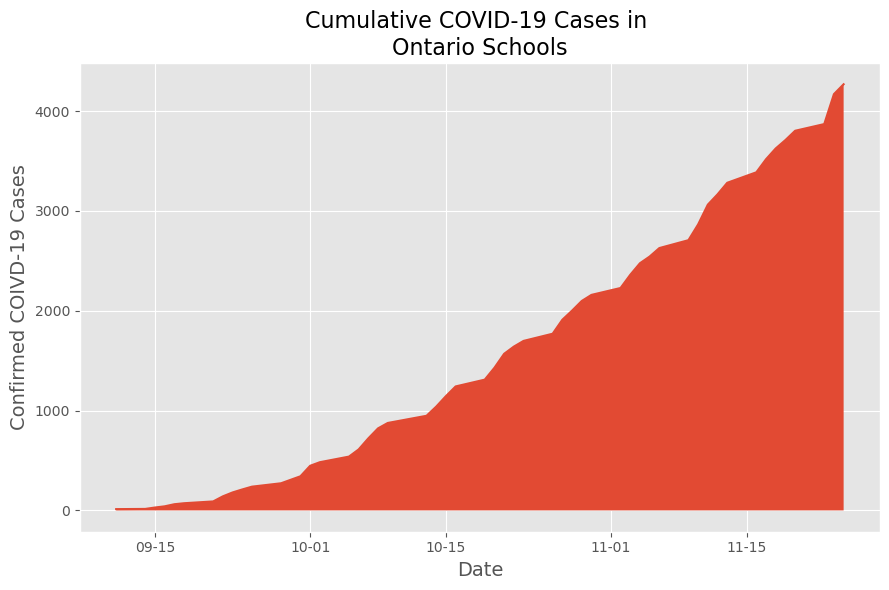

In [122]:
plt.figure(figsize=(8, 4))
plt.style.use(['default', 'ggplot'])

fig, ax = plt.subplots(figsize=(9,6))


ax.plot(os_df.index, os_df.cumulative_school_related_cases)

ax.set_title('Cumulative COVID-19 Cases in \nOntario Schools', fontsize=16)
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed COIVD-19 Cases')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)

ax.fill_between(os_df.index, os_df.cumulative_school_related_cases)

plt.tight_layout()
plt.show()


## Plotting Cumulative COVID-19 Cases for Students, Staff & Unspecified

<Figure size 1000x500 with 0 Axes>

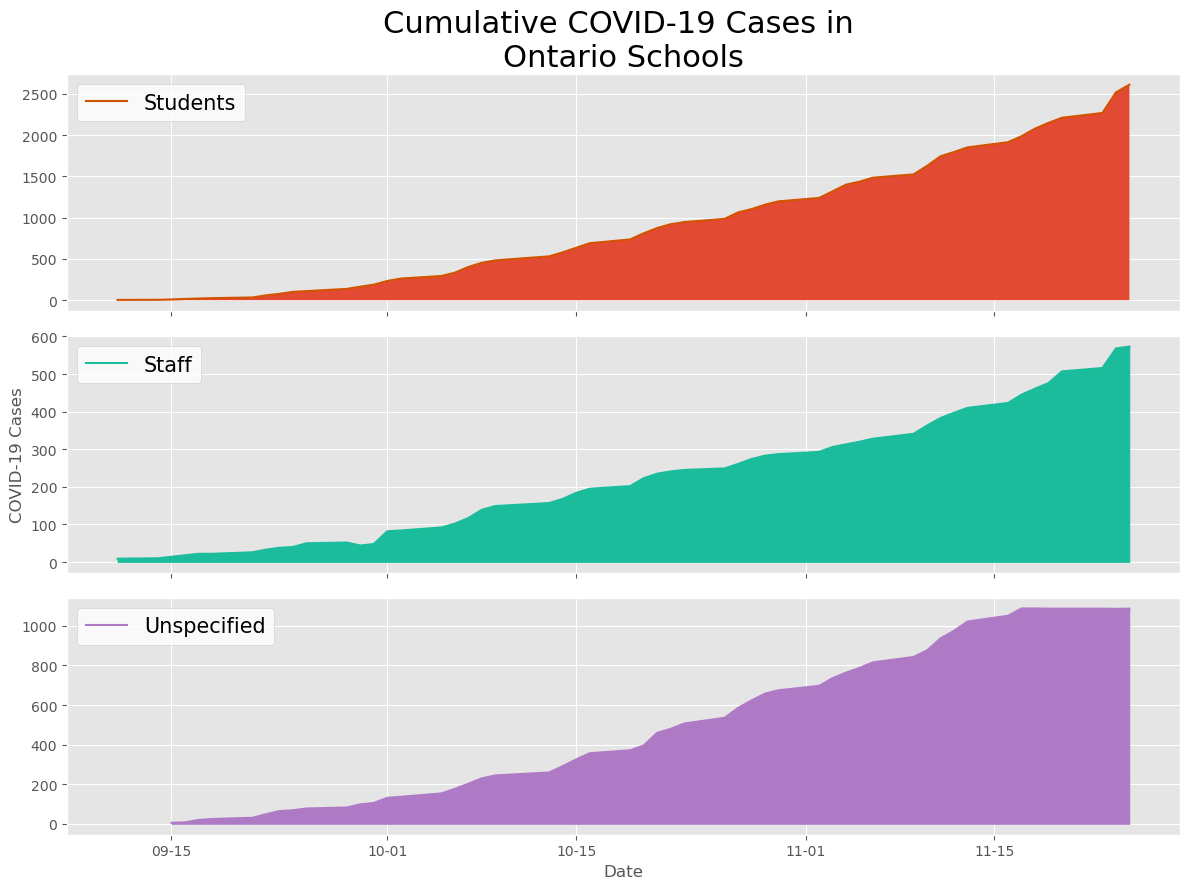

In [123]:
plt.figure(figsize=(10, 5))
plt.style.use(['default', 'ggplot'])

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(12,9))

ax1.plot(os_df.index, os_df.cumulative_school_related_student_cases,
        color="#D35400", label="Students")
ax2.plot(os_df.index, os_df.cumulative_school_related_staff_cases,
        color="#1ABC9C", label="Staff")
ax3.plot(os_df.index, os_df.cumulative_school_related_unspecified_cases,
        color="#AF7AC5", label="Unspecified")

ax1.set_title('Cumulative COVID-19 Cases in \nOntario Schools', 
              fontsize=22)
#ax1.set_xlabel('Date')
#ax1.set_ylabel('Confirmed COIVD-19 Cases')

ax2.set_ylabel("COVID-19 Cases")

ax3.set_xlabel("Date")

ax3.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax1.legend(facecolor="white", prop={'size': 15}, loc = 'upper left')
ax2.legend(facecolor="white", prop={'size': 15})
ax3.legend(facecolor="white", prop={'size': 15})

ax1.fill_between(os_df.index, os_df.cumulative_school_related_student_cases)
ax2.fill_between(os_df.index, os_df.cumulative_school_related_staff_cases, color="#1ABC9C")
ax3.fill_between(os_df.index, os_df.cumulative_school_related_unspecified_cases,color="#AF7AC5")


plt.tight_layout()
plt.show()

## Plotting Weekly COVID-19 Case Totals of Schools vs ONT Data

In [124]:
os_df["week_number"] = os_df.index.weekofyear

C:\Users\P\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


In [125]:
os_weeklysum = os_df.new_total_school_related_cases.resample('W').sum()
# resample dataframe with weekly totals


In [126]:
os_weeklysum = pd.DataFrame({"reported_date":os_weeklysum.index, "Cases":os_weeklysum.values})


In [127]:
os_weeklysum.head()

,reported_date,Cases
0,2020-09-13,0
1,2020-09-20,60
2,2020-09-27,171
3,2020-10-04,251
4,2020-10-11,397


In [128]:
weeklysum_df.head()

,Reported_date,Case
0,2020-06-07,190
1,2020-06-14,152
2,2020-06-21,140
3,2020-06-28,117
4,2020-07-05,118


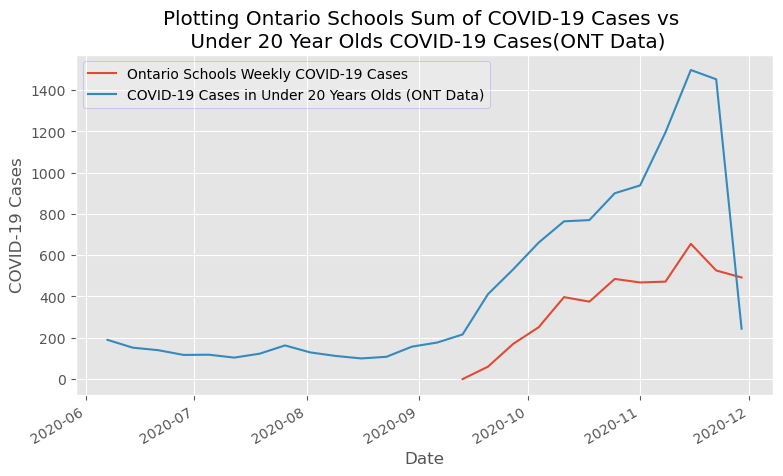

In [138]:


plt.figure(figsize=(9, 5))

plt.plot(os_weeklysum.reported_date, os_weeklysum.Cases, 
         label = "Ontario Schools Weekly COVID-19 Cases")

plt.plot(weeklysum_df.index, weeklysum_df.Case, 
         label = "COVID-19 Cases in Under 20 Years Olds (ONT Data)")


plt.title('Plotting Ontario Schools Sum of COVID-19 Cases vs \n Under 20 Year Olds COVID-19 Cases(ONT Data)')
plt.ylabel('COVID-19 Cases')
plt.xlabel('Date')

plt.gcf().autofmt_xdate()

plt.legend(facecolor='white', framealpha = 0.2, edgecolor='blue')

#plt.tight_layout()
plt.grid(True)
plt.show()

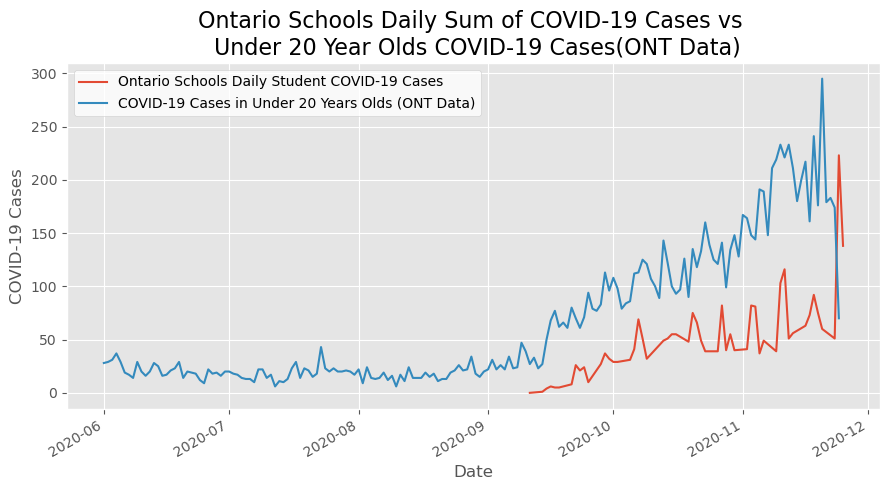

In [137]:
plt.figure(figsize=(9, 5))

plt.plot(os_df.index, os_df.new_school_related_student_cases, 
         label = "Ontario Schools Daily Student COVID-19 Cases")

plt.plot(dailysum_df.index, dailysum_df.Case, 
         label = "COVID-19 Cases in Under 20 Years Olds (ONT Data)")


plt.legend(facecolor='white')

plt.title('Ontario Schools Daily Sum of COVID-19 Cases vs \n Under 20 Year Olds COVID-19 Cases(ONT Data)',
         fontsize=16)
plt.ylabel('COVID-19 Cases')
plt.xlabel('Date')


plt.gcf().autofmt_xdate()



plt.tight_layout()
plt.show()

### Set the Reported date as index for the following 3 datasets

In [134]:
datetime_index = pd.DatetimeIndex(weeklysum_df.Reported_date.values)
weeklysum_df = weeklysum_df.set_index(datetime_index)
weeklysum_df.drop("Reported_date", axis=1, inplace=True)
weeklysum_df.head()

,Case
2020-06-07,190
2020-06-14,152
2020-06-21,140
2020-06-28,117
2020-07-05,118


In [135]:
datetime_index = pd.DatetimeIndex(weeklymean_df.Reported_date.values)
weeklymean_df = weeklymean_df.set_index(datetime_index)
weeklymean_df.drop("Reported_date", axis=1, inplace=True)
weeklymean_df.head()

,Case
2020-06-07,27.0
2020-06-14,22.0
2020-06-21,20.0
2020-06-28,17.0
2020-07-05,17.0


In [136]:
datetime_index = pd.DatetimeIndex(dailysum_df.Reported_date.values)
dailysum_df = dailysum_df.set_index(datetime_index)
dailysum_df.drop("Reported_date", axis=1, inplace=True)
dailysum_df.head()

,Case
2020-06-01,28
2020-06-02,29
2020-06-03,31
2020-06-04,37
2020-06-05,29


## Ontario Schools COVID-19 Cases Weekly Means

In [111]:
os_weeklymean = os_df.new_school_related_student_cases.resample('W').mean().round()
os_weeklymean.head()

2020-09-13     0.0
2020-09-20     4.0
2020-09-27    18.0
2020-10-04    31.0
2020-10-11    45.0
Freq: W-SUN, Name: new_school_related_student_cases, dtype: float64

In [112]:
os_weeklymean = pd.DataFrame({"Date":os_weeklymean.index, "Cases":os_weeklymean.values})

## Plotting Weekly Mean Values of COVID-19

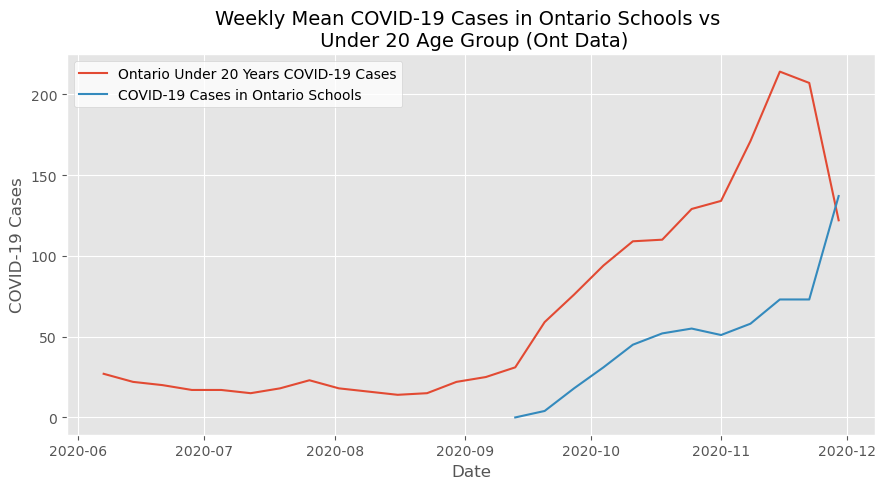

In [113]:
plt.figure(figsize=(9, 5))

plt.plot(weeklymean_df.index, weeklymean_df.Case, 
         label = "Ontario Under 20 Years COVID-19 Cases")

plt.plot(os_weeklymean.Date, os_weeklymean.Cases, 
         label = "COVID-19 Cases in Ontario Schools")


plt.legend(facecolor='white')

plt.title('Weekly Mean COVID-19 Cases in Ontario Schools vs \n Under 20 Age Group (Ont Data)',
         fontsize=14)
plt.ylabel('COVID-19 Cases')
plt.xlabel('Date')


#plt.gcf().autofmt_xdate()



plt.tight_layout()
plt.show()

## Number of Schools in Ontario with COVID-19 Cases

In [114]:
from datetime import datetime

ymax = max(os_df['current_schools_w_cases'].values)
print(f"Highest number of ONT school with COVID-19 cases: {ymax}")
y = os_df['current_schools_w_cases'].values
xpos = 0
for e, i in enumerate(y):
    if i == ymax:
        xpos = e
xmax = os_df.index[[xpos]]
#print(xpos)
print(xmax)

Highest number of ONT school with COVID-19 cases: 703
DatetimeIndex(['2020-11-24'], dtype='datetime64[ns]', freq=None)


## Schools Currently CLosed:

In [139]:
os_df[os_df.reported_date == max(os_df.reported_date)].current_schools_closed

2020-11-25    4
Name: current_schools_closed, dtype: int64

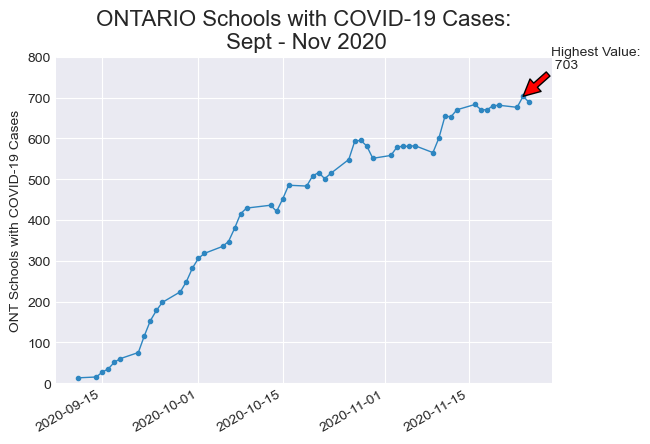

In [140]:
plt.style.use(['default', 'seaborn-dark'])

fig, ax = plt.subplots()


ax.plot(os_df.index, os_df.current_schools_w_cases,
       marker='.', linestyle='-', linewidth=1.0, label='Daily',
       color = '#2E86C1')

#ax.plot(weekly_mean.loc[:, 'cumulative_school_related_cases'],
#       marker='o', markersize=8, linestyle='-', label="Week Mean Resample")

ax.set_ylabel("ONT Schools with COVID-19 Cases")
ax.set_title("ONTARIO Schools with COVID-19 Cases:\n Sept - Nov 2020", 
             fontsize=16)

ax.annotate(f"Highest Value:\n {ymax}", xy = (xmax, ymax), xytext=(20, 20),
            textcoords='offset points',
            arrowprops=dict(facecolor='red')
           )

ax.set_ylim(0, 800)
#ax.set_ylim(['2020-09-01', '2020-12-01'])

fig.autofmt_xdate()
plt.grid(True)

plt.plot();